In [1]:
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, MultiPoint
import pandas as pd
import matplotlib.pyplot as plt
import mplleaflet
import matplotlib.cm as cm
import matplotlib.colors as co
import numpy as np
import random
import networkx as nx
from scipy import sparse
import scipy.sparse.linalg

#1 North America 2 Central America 3 South America
#4 East Asia 5 Southeast Asia 6 South Asia 7 Central Asia 12 Oceania
#8 Western Europe 9 Eastern Europe
#10 Middle East 11 Sub-saharian Africa

dataframe = pd.read_csv('Features pre-processed.csv', 
                            usecols=["eventid", "country", "region", "longitude", "latitude", "iyear", "nkill", "gname",
                                     "success", "suicide", "attacktype1_txt", "targtype1_txt", "natlty1", "weaptype1", "related"]);
dataframe.columns;

Index:  0
Index:  1
Index:  2
Index:  4
Index:  5
Index:  6


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

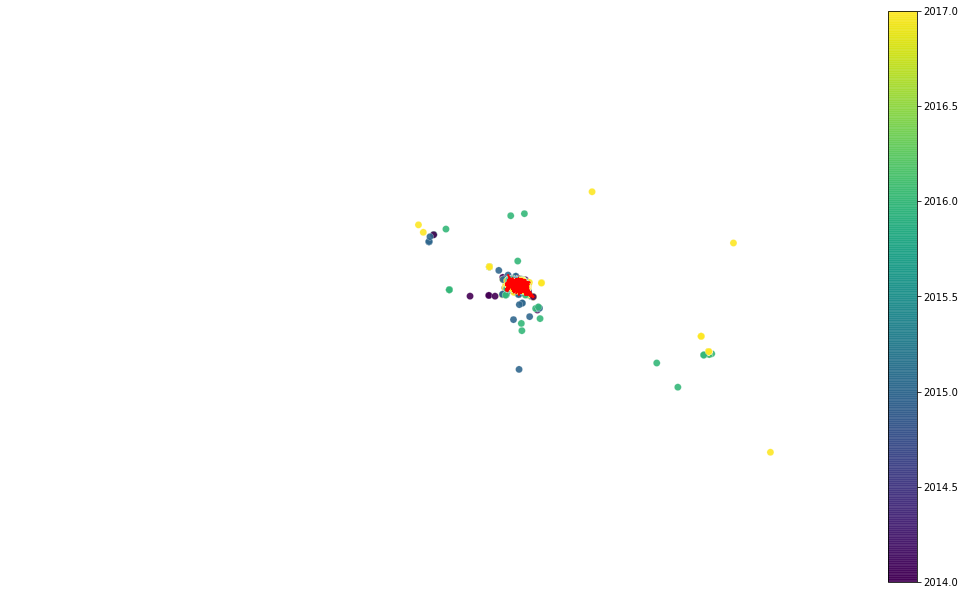

In [8]:
world = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-180, 
        llcrnrlat=-60,
        urcrnrlon=180,
        urcrnrlat=80,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

isil_dataframe = dataframe.loc[dataframe['gname'] == "Islamic State of Iraq and the Levant (ISIL)" ]

isil_points = pd.Series(
                [Point(world(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(isil_dataframe['longitude'], 
                                               isil_dataframe['latitude'])])

n_nodes = isil_dataframe['latitude'].size
adj_isil = np.zeros((n_nodes, n_nodes))

lons = isil_dataframe['longitude'].values
lats = isil_dataframe['latitude'].values

weapon_isil  = isil_dataframe['weaptype1'].values


x, y = world(lons, lats)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.set_size_inches(18.5, 10.5)

year_isil = isil_dataframe["iyear"]

dev = world.scatter(
            [geom.x for geom in isil_points],
            [geom.y for geom in isil_points],
            50, marker='o', lw=.25,
            c=year_isil, edgecolor='w',
            alpha=0.9,antialiased=True,
            zorder=2)

plt.colorbar()

# To determine if two nodes are connected, we compute a threshold by looking at their similarities with respect to specific 
# features, thus allowing to compute the probability for an edge to be generated

n_edges = 0

for index, rows in isil_dataframe.iterrows():
    print("Index: ", index)
    for index2, rows2 in isil_dataframe.iterrows():
        if (index2 > index):
            if (rows['natlty1'] == rows2['natlty1']):
                n_edges = n_edges + 1
                lons = [rows['longitude'], rows2['longitude']]
                lats = [rows['latitude'], rows2['latitude']]
                x, y = world(lons, lats)
                world.plot(x, y, marker=None,color='r')
                
        

print("N_edges: ", n_edges)
print("N_nodes: ", n_nodes)


world.fillcontinents(color='beige',lake_color='lightblue');
world.drawcountries();
world.drawmapboundary(fill_color='lightblue');
plt.title('Attacks claimed by ISIL from 2014 to 2017')
plt.legend()